In [43]:
import os
import glob
import sys

import numpy as np
import tables as tb
import pandas as pd

from invisible_cities.core import core_functions as coref

from lmfit.models import GaussianModel, LinearModel

from invisible_cities.io import mcinfo_io as mcio
from collections import defaultdict

In [25]:
import matplotlib        as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
%matplotlib inline
### Useful parameters for plots
mpl.rcParams["figure.figsize"]          = 12,10
mpl.rcParams["font.size"]               = 20
mpl.rcParams["figure.max_open_warning"] = 100
mpl.rcParams["font.size"]               = 20
mpl.rcParams["font.weight"]             ='normal'
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['figure.facecolor'] = 'w';

In [20]:
filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_x0mm_y0_z-51mm_1e6.h5'
filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_x0_y0_z-51mm_1e6.h5'
filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_x38mm_y0_z-51mm_1e6.h5'
#filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_tpb0.25um_x0mm_y0_z-51mm_1e6.h5'
filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_tpb1.00um_x0mm_y0_z-51mm_1e6.h5'

eff   = 0.6
thick = '1'#0.1
light = ['true', 'false'][1]
dist  = -46#40#40#-56

filename = f'/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff{eff:.1f}_thick{thick}_light{light}/ar_light_z{dist}mm_10000000.h5'
#filename = '/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff0.6_thick1_lighttrue/ar_light_z-46mm_10000000.h5'
#filename = '/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff0.6_thick1_lightfalse/ar_light_z40mm_10000000.h5'
#filename = '/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff0.6_thick1_lighttrue/ar_light_z40mm_10000000.h5'
#filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_tpb30um_x0mm_y0_z-51mm_1e6.h5'
#filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_-46mm_1e6.h5'

data = mcio.load_mcsensor_response_df(filename).reset_index()

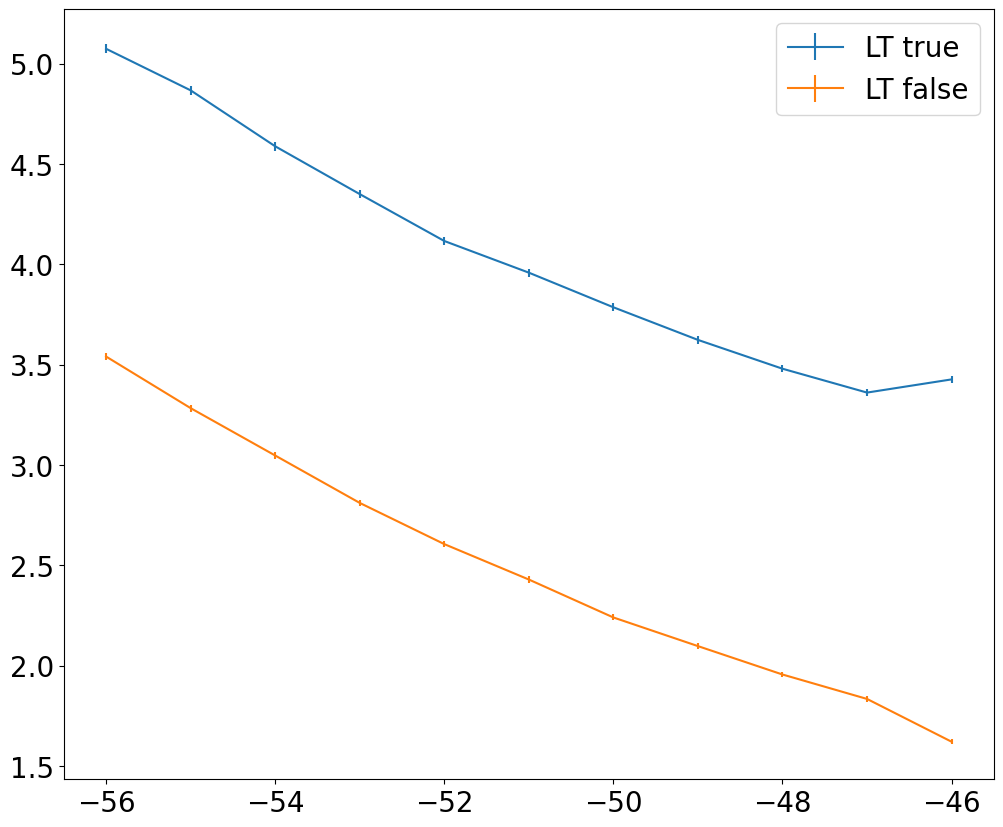

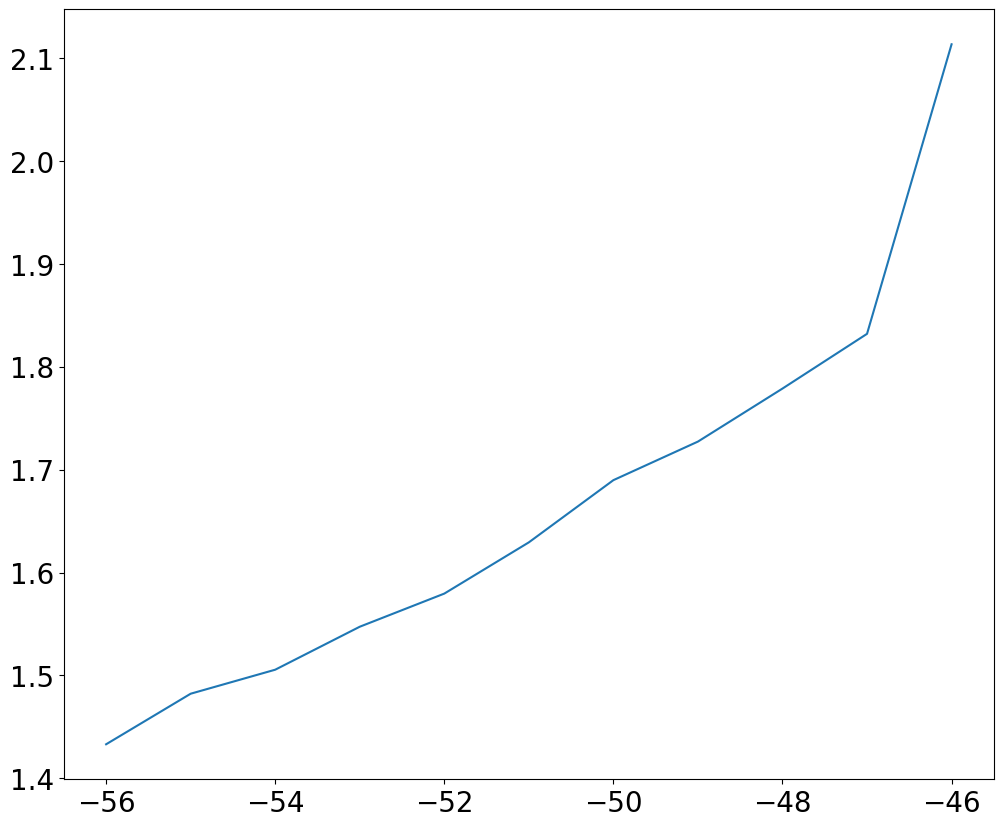

In [47]:
filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_x0mm_y0_z-51mm_1e6.h5'
filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_x0_y0_z-51mm_1e6.h5'
filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_x38mm_y0_z-51mm_1e6.h5'
#filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_tpb0.25um_x0mm_y0_z-51mm_1e6.h5'
filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_tpb1.00um_x0mm_y0_z-51mm_1e6.h5'

eff   = 0.6
thick = '1'#0.1
lights = ['true', 'false']
dists  = np.arange(-56, -46+1)#40#40#-56

nevents = 1000000
lcs   = defaultdict(list)
lcs_e = defaultdict(list)
for light in lights:
  
    for dist in dists:
        filename = f'/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff{eff:.1f}_thick{thick}_light{light}/ar_light_z{dist}mm_{nevents}.h5'
    #filename = '/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff0.6_thick1_lighttrue/ar_light_z-46mm_10000000.h5'
    #filename = '/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff0.6_thick1_lightfalse/ar_light_z40mm_10000000.h5'
    #filename = '/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff0.6_thick1_lighttrue/ar_light_z40mm_10000000.h5'
    #filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_tpb30um_x0mm_y0_z-51mm_1e6.h5'
    #filename = '/home/ander/Work/GaP/nexus_quick_sim/data/single_-46mm_1e6.h5'
    
        data = mcio.load_mcsensor_response_df(filename).reset_index()
        
        lcs[light].append(len(data)/nevents * 100)
        lcs_e[light].append(np.sqrt(len(data))/len(data) * lcs[light][-1])
        
    plt.errorbar(dists, lcs[light], yerr=lcs_e[light], label=f'LT {light}')
plt.legend()

plt.figure()
plt.plot(dists, np.array(lcs[lights[0]])/np.array(lcs[lights[1]]))

<ErrorbarContainer object of 3 artists>

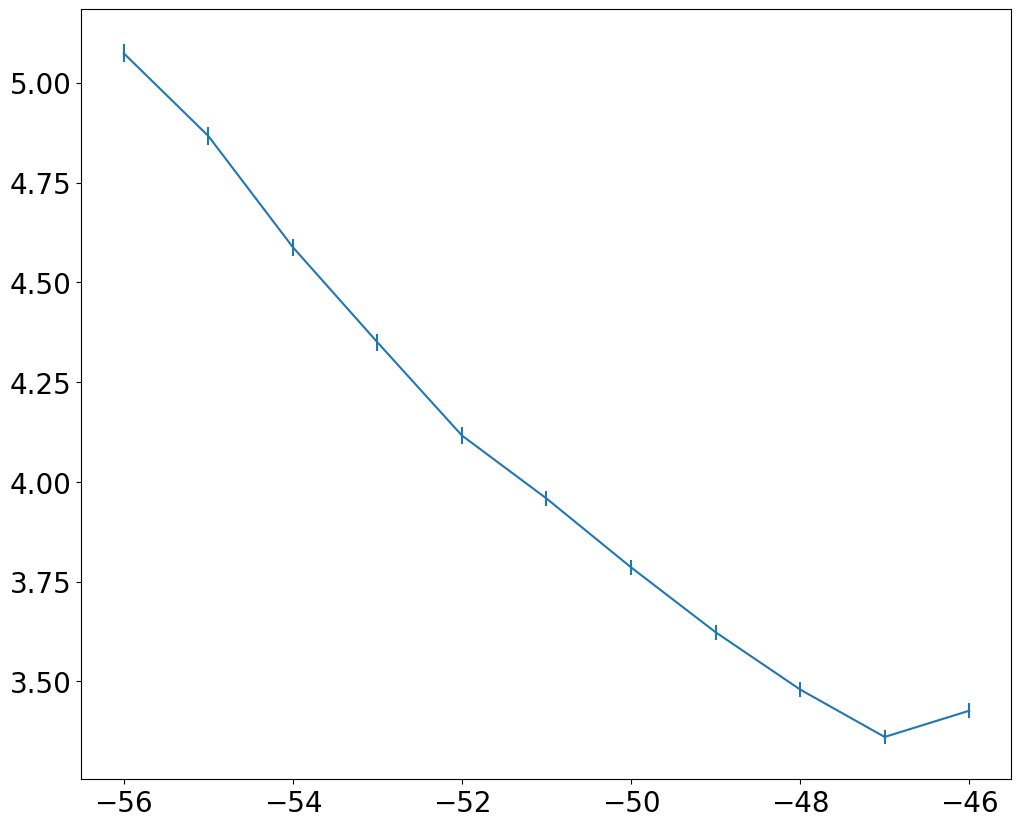

In [18]:
3.3/1.5

2.1999999999999997

3.3169999999999997

In [13]:
5.12/3.6

1.4222222222222223

In [6]:
3.8/2.32

1.6379310344827587

In [6]:
3.8/2.32

1.6379310344827587

In [37]:
pmt_rad  = 2.54/2
pmt_dist = 8.7 + 1 + 0.2
solid_angle = (1 - pmt_dist/np.sqrt(pmt_dist**2 + pmt_rad**2))/2
solid_angle*100*0.35*0.6/2*7

0.2987061688390445

In [ ]:
3.83

In [8]:
2.32/0.18

12.88888888888889

In [23]:
0.48/0.18

2.6666666666666665

In [46]:
np.rad2deg(np.arcsin(1.41/1.67))

57.598230543534534

In [49]:
np.rad2deg(np.arcsin(1.41/5.7))

14.321843367958843

In [1]:
lc = len(data)/1e6#*100
ene = 41.5 * 1000
wi  = 22
ne  = ene/wi

kv  = 11.5
p   = 8.4
elyield = (81*kv/p - 47)*p

elyield * ne * lc

NameError: name 'data' is not defined

In [12]:
#lc = len(data)/1e6#*100
ene = 41.5 * 1000
wi  = 22
ne  = ene/wi

kv  = 7.
p   = 4.3#8.4
elyield = (81*kv/p - 47)*p

elyield #* ne * lc

364.9

In [13]:
kv/p

1.627906976744186

In [51]:
397083 - (90000 + 69083)

238000